### Import 

In [26]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sns.set()

---
### Load

In [22]:
# df_business = pd.read_json('./yelp_dataset/yelp_academic_dataset_business.json', lines=True)
# df_checkin = pd.read_json('./yelp_dataset/yelp_academic_dataset_checkin.json', lines=True)
# df_review = pd.read_json('./yelp_dataset/yelp_academic_dataset_review.json', lines=True)
# df_tip = pd.read_json('./yelp_dataset/yelp_academic_dataset_tip.json', lines=True)
# df_user = pd.read_json('./yelp_dataset/yelp_academic_dataset_user.json', lines=True)

# df_business.to_csv('./yelp_dataset/yelp_academic_dataset_business.csv', index=False)
# df_checkin.to_csv('./yelp_dataset/yelp_academic_dataset_checkin.csv', index=False)
# df_review.to_csv('./yelp_dataset/yelp_academic_dataset_review.csv', index=False)
# df_tip.to_csv('./yelp_dataset/yelp_academic_dataset_tip.csv', index=False)
# df_user.to_csv('./yelp_dataset/yelp_academic_dataset_user.csv', index=False)

In [2]:
path_business = './yelp_dataset/yelp_academic_dataset_business.csv'
path_checkin = './yelp_dataset/yelp_academic_dataset_checkin.csv'
path_review = './yelp_dataset/yelp_academic_dataset_review.csv'
path_tip = './yelp_dataset/yelp_academic_dataset_tip.csv'
path_user = './yelp_dataset/yelp_academic_dataset_user.csv'

In [166]:
df_business = pd.read_csv(path_business)
df_checkin = pd.read_csv(path_checkin)
df_review = pd.read_csv(path_review)
df_tip = pd.read_csv(path_tip)
df_user = pd.read_csv(path_user)

---
### Preprocessing

* Search cities containing rich information:

> Drop values which do not have categories since they are not valueable for prediction

In [167]:
df_business.dropna(subset=['categories'], inplace=True)

> Clean city names by removing puncatuation and changing all to capital forms

In [169]:
df_business['city'] = df_business['city'].str.strip().str.capitalize()

In [170]:
df_business['city'].value_counts().sort_values(ascending=False)

Las vegas          31600
Toronto            20334
Phoenix            20127
Charlotte          10407
Scottsdale          9338
                   ...  
Huntingdon             1
Montréal-west          1
Richmond height        1
Warrensville           1
Blue mounds            1
Name: city, Length: 1134, dtype: int64

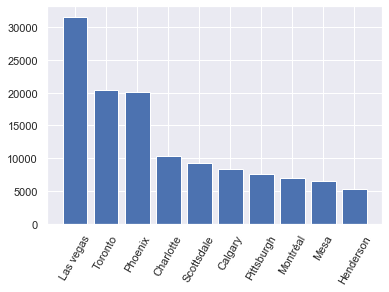

In [171]:
plt.bar(df_business['city'].value_counts().sort_values(ascending=False).index[:10], df_business['city'].value_counts().sort_values(ascending=False).values[:10])
plt.xticks(rotation=60)
plt.show()

* Toronto is chosen for further analysis:

In [151]:
df_business_toronto = df_business[df_business['city']=='Toronto']

In [153]:
df_business_toronto[df_business_toronto['categories'].str.contains('Restaurants')]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Restaurants, Burgers, Food",NaN
73,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,116,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
110,8k62wYhDVq1-652YbJi5eg,Tim Hortons,90 Adelaide Street W,Toronto,ON,M5H 3V9,43.649859,-79.382060,3.0,8,1,"{'OutdoorSeating': 'False', 'RestaurantsDelive...","Bagels, Donuts, Food, Cafes, Coffee & Tea, Res...",NaN
149,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,ON,M3A 1Z3,43.765279,-79.326248,3.0,11,1,"{'NoiseLevel': ""'loud'"", 'BusinessParking': ""{...","Fast Food, Restaurants, Chicken Shop",NaN
150,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,2048 Danforth Avenue,Toronto,ON,M4C 1J6,43.685608,-79.313936,4.5,24,1,"{'DogsAllowed': 'False', 'OutdoorSeating': 'Tr...","Coffee & Tea, Restaurants, Sandwiches, Food","{'Monday': '0:0-0:0', 'Tuesday': '7:30-17:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209300,thzyiQZb16zD8wMliaEfRQ,Sushi Supreme,1995 Yonge Street,Toronto,ON,M4S 1Z8,43.700617,-79.396762,4.0,104,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Sushi Bars, Restaurants, Japanese","{'Monday': '12:0-23:0', 'Tuesday': '12:0-23:0'..."
209315,eUi3O-8Gqh_nJ_ZhO-25gQ,Get & Go Burrito,"1077 Wilson Avenue, Unit 8",Toronto,ON,M3K 1G7,43.726656,-79.480365,3.5,43,1,"{'BusinessParking': ""{'garage': False, 'street...","Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
209328,yFQCdWr_k1pTObzHPGis9Q,Grasshopper Restaurant,310 College Street,Toronto,ON,M5T 1S2,43.657716,-79.402098,4.0,177,1,"{'DogsAllowed': 'False', 'BikeParking': 'True'...","Vegan, Restaurants, Vegetarian, Salad","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
209359,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma,1075 Martin Grove Road,Toronto,ON,M9W 4W6,43.701807,-79.575135,4.0,16,1,"{'GoodForKids': 'True', 'HasTV': 'True', 'Rest...","Restaurants, Mediterranean","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [103]:
df_checkin.iloc[0]['date'].split(',')

['2016-04-26 19:49:16',
 ' 2016-08-30 18:36:57',
 ' 2016-10-15 02:45:18',
 ' 2016-11-18 01:54:50',
 ' 2017-04-20 18:39:06',
 ' 2017-05-03 17:58:02',
 ' 2019-03-19 22:04:48']

In [154]:
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [155]:
df_tip.head()

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


In [156]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31
